In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter

In [2]:
dataframe = pd.read_csv('Hipertension_Arterial_Mexico_limpo.csv', sep=';')
dataframe = dataframe.replace(',', '.', regex=True)
for col in dataframe.columns:
    try:
        dataframe[col] = dataframe[col].astype(float)
    except ValueError:
        pass

In [5]:
# Separamos el dataframe en x y
y = dataframe['riesgo_hipertension']
x = dataframe[['masa_corporal', 'tension_arterial', 'peso', 'actividad_total','medida_cintura', 'estatura', 'edad', 'valor_insulina', 'sueno_horas', 'valor_colesterol_ldl']]

# Dividimos en sets de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25, stratify=y)

# Aplicar SMOTETomek para balancear el conjunto de entrenamiento
smt = SMOTETomek(sampling_strategy='auto', random_state=42)  # Cambia a sampling_strategy=1.0 si prefieres
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

In [7]:
# Verificar distribución
print("Distribución antes de SMOTETomek: {}".format(Counter(y_train)))
print("Distribución después de SMOTETomek: {}".format(Counter(y_train_res)))

Distribución antes de SMOTETomek: Counter({1.0: 1682, 0.0: 435})
Distribución después de SMOTETomek: Counter({1.0: 1670, 0.0: 1670})


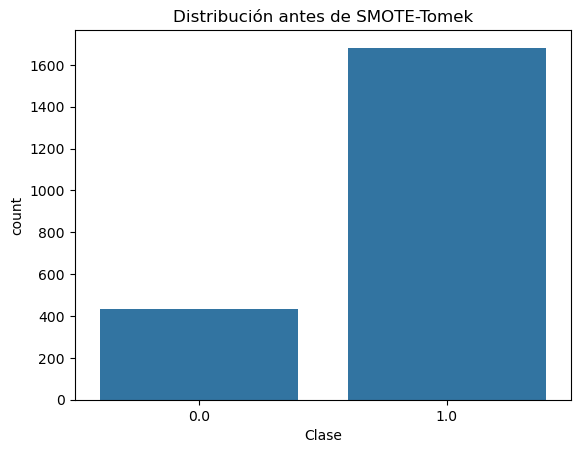

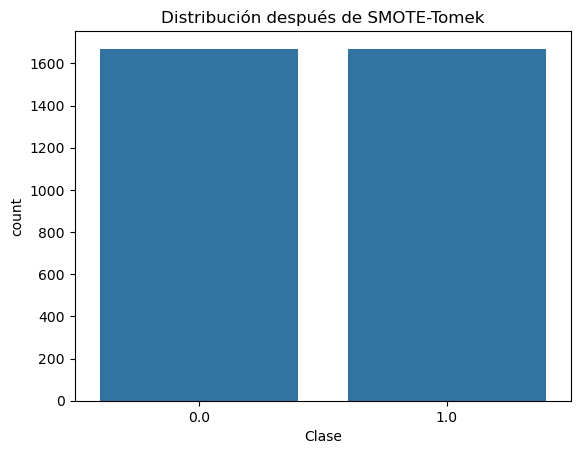

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Antes de SMOTE-Tomek
df_before = pd.DataFrame({'Clase': y_train})
sns.countplot(x='Clase', data=df_before)
plt.title('Distribución antes de SMOTE-Tomek')
plt.show()

# Después de SMOTE-Tomek
df_after = pd.DataFrame({'Clase': y_train_res})
sns.countplot(x='Clase', data=df_after)
plt.title('Distribución después de SMOTE-Tomek')
plt.show()

In [11]:
balanced_data = pd.DataFrame(x_train_res, columns=x.columns)
balanced_data['riesgo_hipertension'] = y_train_res

# Guardar el dataset balanceado en un archivo CSV
balanced_data.to_csv('Hipertension_Arterial_Mexico_balanced.csv', index=False)
print("Dataset balanceado guardado en 'Hipertension_Arterial_Mexico_balanced.csv'")

Dataset balanceado guardado en 'Hipertension_Arterial_Mexico_balanced.csv'


In [13]:
import pandas as pd
from collections import Counter

balanced_data = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')
print("Distribución en el dataset balanceado:", Counter(balanced_data['riesgo_hipertension']))

# Calcular proporciones
total_samples = len(balanced_data)
class_counts = Counter(balanced_data['riesgo_hipertension'])
print("Proporción clase 0 (No tiene):", class_counts[0] / total_samples)
print("Proporción clase 1 (Tiene riesgo):", class_counts[1] / total_samples)

Distribución en el dataset balanceado: Counter({1.0: 1670, 0.0: 1670})
Proporción clase 0 (No tiene): 0.5
Proporción clase 1 (Tiene riesgo): 0.5
